## 1. Data Preprocessing

### 1.1 Data Quality Issues

We will first download the dataset using Pandas read_csv() function and display its first 5 data points. 

**<font color="red">Code:</font>**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (replace 'path_to_dataset' with the actual path to your dataset)
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
dataset =  pd.read_csv('../data/diabetes.csv', header = 0)

print('Number of instances = %d' % (dataset.shape[0]))
print('Number of attributes = %d' % (dataset.shape[1]))

# Display the first few rows of the dataset
print(dataset.head())

Number of instances = 768
Number of attributes = 9
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 1.2 Missing Values

Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data. 

**<font color="red">Code:</font>**

In [3]:
import numpy as np

dataset = dataset.replace('?', np.NaN)

print('Number of instances = %d' % dataset.shape[0])
print('Number of attributes = %d' % dataset.shape[1])

print('Number of missing values:')
for col in dataset.columns:
    print('\t%s: %d' % (col, dataset[col].isna().sum()))

Number of instances = 768
Number of attributes = 9
Number of missing values:
	Pregnancies: 0
	Glucose: 0
	BloodPressure: 0
	SkinThickness: 0
	Insulin: 0
	BMI: 0
	DiabetesPedigreeFunction: 0
	Age: 0
	Outcome: 0


### 1.3 Duplicate Data

**<font color="red">Code:</font>**

We first check for duplicate instances in the movies dataset. We can see that there are no duplicates.

In [4]:
dups = dataset.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 1.4 Aggregation

Data aggregation is the process of collecting data to present it in summary form. 
In order to get to know the data better, the code below will show how different factors influence the Outcome (0=non-diabetic, 1=diabetic).

**<font color="red">Code:</font>**


Aggregated Statistics by Outcome:
        Pregnancies                      Glucose                    \
               mean median       std        mean median        std   
Outcome                                                              
0          3.298000    2.0  3.017185  109.980000  107.0  26.141200   
1          4.865672    4.0  3.741239  141.257463  140.0  31.939622   

        BloodPressure                   SkinThickness  ...     Insulin  \
                 mean median        std          mean  ...         std   
Outcome                                                ...               
0           68.184000   70.0  18.063075     19.664000  ...   98.865289   
1           70.824627   74.0  21.491812     22.164179  ...  138.689125   

               BMI                  DiabetesPedigreeFunction                   \
              mean median       std                     mean median       std   
Outcome                                                                         


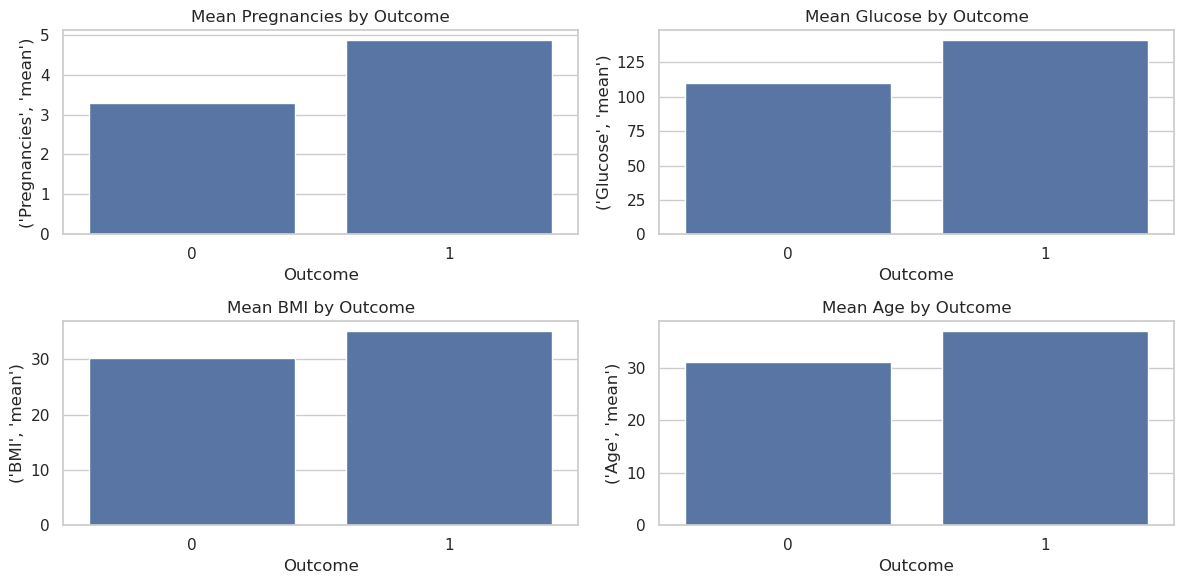

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

outcome_aggregation = dataset.groupby('Outcome').agg(['mean', 'median', 'std'])

# Display aggregated statistics
print("\nAggregated Statistics by Outcome:")
print(outcome_aggregation)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot means
plt.subplot(2, 2, 1)
sns.barplot(x=outcome_aggregation.index, y=('Pregnancies', 'mean'), data=outcome_aggregation)
plt.title('Mean Pregnancies by Outcome')

plt.subplot(2, 2, 2)
sns.barplot(x=outcome_aggregation.index, y=('Glucose', 'mean'), data=outcome_aggregation)
plt.title('Mean Glucose by Outcome')

plt.subplot(2, 2, 3)
sns.barplot(x=outcome_aggregation.index, y=('BMI', 'mean'), data=outcome_aggregation)
plt.title('Mean BMI by Outcome')

plt.subplot(2, 2, 4)
sns.barplot(x=outcome_aggregation.index, y=('Age', 'mean'), data=outcome_aggregation)
plt.title('Mean Age by Outcome')

plt.tight_layout()
plt.show()

## 2. Classification tasks

### 2.1 Logistic regression

We implemented logistic regression for a binary classification task. It begins by separating the dataset into features (X) and the target variable (y). The dataset is then split into training and testing sets using the train_test_split function from scikit-learn. Feature standardization is applied using StandardScaler to ensure consistent scaling across features. The logistic regression model is initialized, trained on the standardized training set, and subsequently used to make predictions on the test set. Finally, the results, including accuracy percentage, confusion matrix, and classification report, are displayed for a comprehensive assessment of the logistic regression model's performance.

**<font color="red">Code:</font>**

In [6]:

# Separate features (X) and target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 75.32%

Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



### 2.2 Decision tree classifier

We utilized the scikit-learn library to implement a Decision Tree Classifier for a binary classification task, specifically targeting diabetes prediction. It starts by separating the target variable ('Outcome') from the features in the dataset. The Decision Tree Classifier is then initialized with specified parameters such as 'entropy' as the criterion for information gain and a maximum depth of 3 to prevent overfitting. The classifier is trained on the entire dataset using the fit method. 

**<font color="red">Code:</font>**

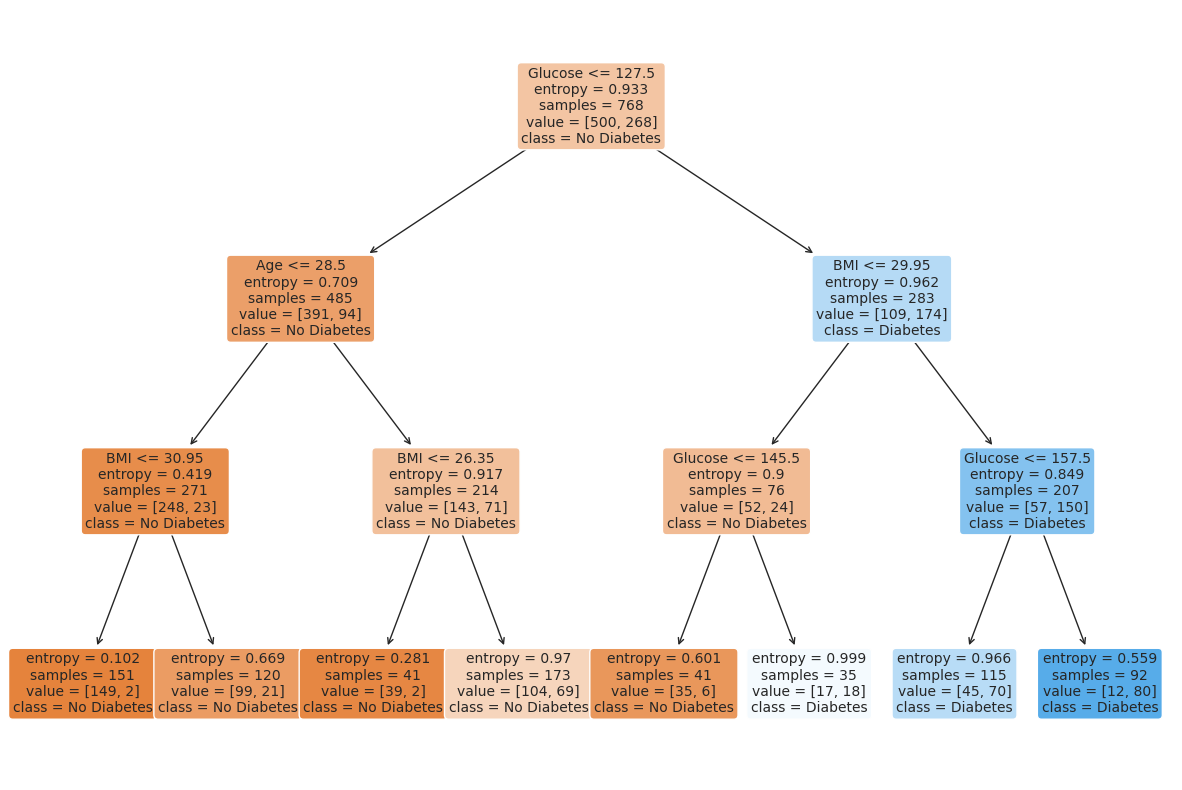

In [7]:
from sklearn import tree
Y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis=1)

# Initialize the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train the classifier
clf = clf.fit(X, Y)

# Plotting a simplified Decision Tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, fontsize=10)
plt.show()

One potential issue that may arise is the possibility of overfitting due to the limited depth of the tree. Additionally, a class imbalance in the target variable ('Outcome'), it impacted the model's ability to generalize well to minority classes. It's important to consider these factors and potentially fine-tune the model parameters or address class imbalance for improved performance.

### 2.3 Histogram analysis

We decided to perform histogram analysis to analyse the class imbalance problem. We displayed a set of histograms, each representing the distribution of a specific feature in the Pima Indians Diabetes dataset. This visualization can provide insights into the data distribution and help identify patterns or characteristics of individual features.

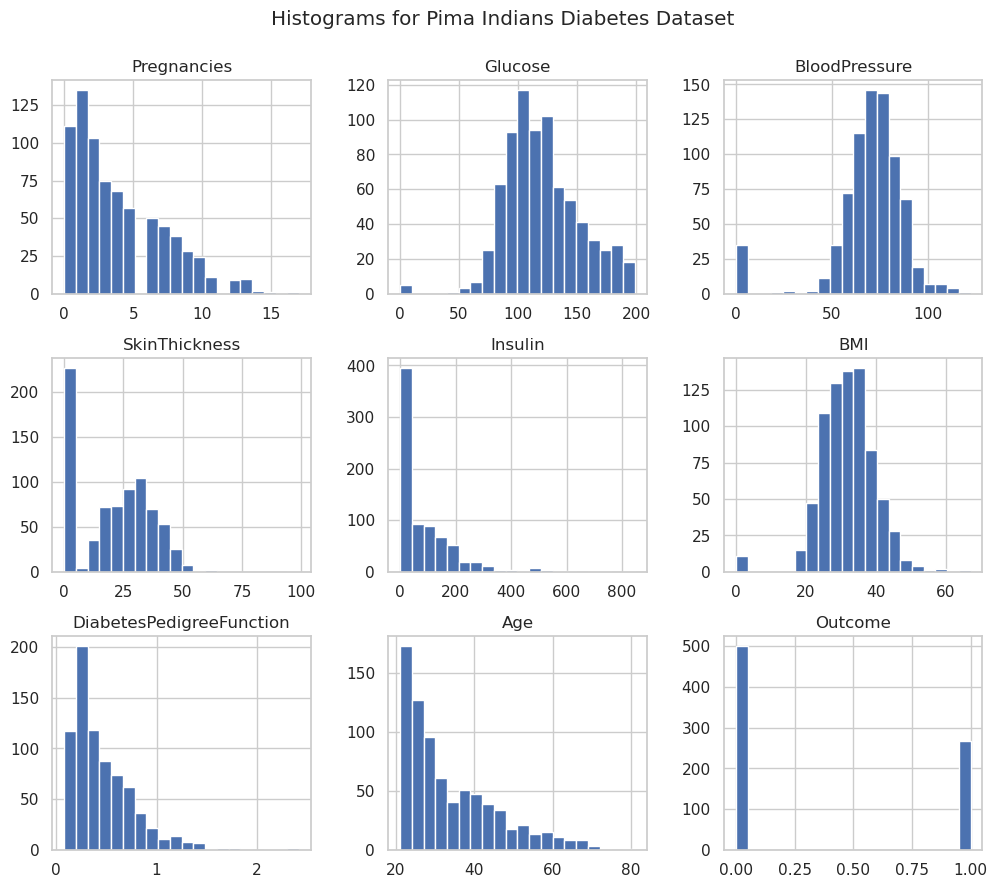

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for Pima Indians Diabetes Dataset', y=0.95)
plt.show()

The histograms show the distribution of the different features in the Pima Indians Diabetes Dataset.

**Pregnancies:** The distribution of pregnancies is skewed to the left, with most women having 0-3 pregnancies. There is a small tail of women with 4 or more pregnancies.

**Glucose:** The distribution of glucose is approximately normal, with most women having glucose levels between 70 and 150 mg/dL. There is a small tail of women with glucose levels above or below this range.

**Blood pressure:** The distribution of blood pressure is also approximately normal, with most women having blood pressure between 60 and 90 mmHg. There is a small tail of women with blood pressure above or below this range.

**Skin thickness:** The distribution of skin thickness is skewed to the right, with most women having skin thickness between 20 and 50 mm. There is a small tail of women with skin thickness above or below this range.

**Insulin:** The distribution of insulin is also skewed to the right, with most women having insulin levels between 20 and 100 µU/mL. There is a small tail of women with insulin levels above or below this range.

**BMI:** The distribution of BMI is approximately normal, with most women having a BMI between 20 and 30. There is a small tail of women with a BMI above or below this range.

**Diabetes pedigree function:** The distribution of diabetes pedigree function is approximately normal, with most women having a diabetes pedigree function between 0.0 and 0.5. There is a small tail of women with a diabetes pedigree function above or below this range.

**Age:** The distribution of age is skewed to the right, with most women between 20 and 50 years old. There is a small tail of women older than 50 years old.

The "Outcome" feature, which indicates whether a woman has diabetes (1) or not (0), has a very unequal distribution. There are only 268 instances (34.2%) of women with diabetes, while there are 500 instances (65.8%) of women without diabetes. This imbalance can make it difficult for machine learning models to accurately predict whether a woman has diabetes.


### 3. Conclusion

There are several techniques that we could have used to address class imbalance, such as: Oversampling, Undersampling, Cost-sensitive learning, Ensemble methods. 

Future improvements for the Pima Indians Diabetes dataset could involve utilizing a larger portion of the available data, perhaps by adjusting the train-test split ratio or employing cross-validation techniques. This would allow the model to learn from a more diverse set of examples. Additionally, implementing pattern mining techniques, such as association rule mining or sequential pattern mining, could uncover hidden relationships, contributing to a deeper understanding of the factors influencing diabetes outcomes.

